Isabelle Kirby

IRK180000

CS 4375.003

Here I start by importing everything I need for this project. I know you can just have it when its needed, but I prefer throwing them all in the same area.
Then I read in the data from Auto.csv to the dataframe.

In [102]:

import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


In [103]:
#row = len(df.axes[0])
#col = len(df.axes[1])
#s = 'Dimensions (rox X column): ' + repr(row) + ' X ' + repr(col)
#print(s)

print('Dimensions of Data Frame (rox X column): ', df.shape)

Dimensions of Data Frame (rox X column):  (392, 9)


For mpg, the average (given in by mean) is 23.44 mpg with a range (given by max - min) of 37 mpg.

In [104]:
df['mpg'].describe()


count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

For weight, the average (given in by mean) is 2977.584 lbs with a range (given by max - min) of 3527 lbs.

In [105]:
df['weight'].describe()

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

For year, the average year (given in by mean) was '76.01 with a range (given by max - min) of 12 years.

In [106]:
df['year'].describe()

count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

In [107]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

In [108]:
df['cylinders'] = df['cylinders'].astype('category').cat.codes

In [109]:
df['origin'] = df['origin'].astype('category')

In [110]:
df.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

In [111]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

In [112]:
df = df.dropna()
#row = len(df.axes[0])
#col = len(df.axes[1])
#s = 'Dimensions (rox X column): ' + repr(row) + ' X ' + repr(col)
#print(s)
print('Dimensions of Data Frame (rox X column): ', df.shape)

Dimensions of Data Frame (rox X column):  (389, 9)


In [113]:
def mpg_high(x):
    if x > df['mpg'].mean():
      return 1
    else:
      return 0

df['mpg_high'] = df['mpg'].map(mpg_high)
df = df.drop(columns=['mpg', 'name'])
df['mpg_high'] = df['mpg_high'].astype('category')
df.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.head of      cylinders  displacement  horsepower  weight  acceleration  year origin  \
0            4         307.0         130    3504          12.0  70.0      1   
1            4         350.0         165    3693          11.5  70.0      1   
2            4         318.0         150    3436          11.0  70.0      1   
3            4         304.0         150    3433          12.0  70.0      1   
6            4         454.0         220    4354           9.0  70.0      1   
..         ...           ...         ...     ...           ...   ...    ...   
387          1         140.0          86    2790          15.6  82.0      1   
388          1          97.0          52    2130          24.6  82.0      2   
389          1         135.0          84    2295          11.6  82.0      1   
390          1         120.0          79    2625          18.6  82.0      1   
391          1         119.0          82    2720          19.4  82.0      1   

    mpg_high  
0     

This catplot is simple. I tells us the porportion of cars with a high fuel efficiency (mpg > average mpg) to those who have a lesser fuel efficiency. Most cars have a lower fuel efficiency.

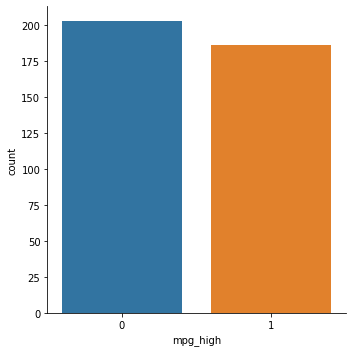

In [114]:
sb.catplot(x="mpg_high", kind='count', data=df)

 This relplot shows us the correlation between the weight of a car, its horsepower, and its fuel efficiency. Generally as a car gets heavier and there is more horsepower, the fuel efficiency of the car decreases.

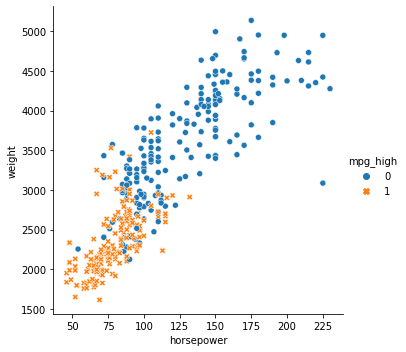

In [115]:
sb.relplot(x='horsepower', y='weight', data=df, hue=df.mpg_high, style=df.mpg_high)

This boxplot shows us that the majority of cars with a good fuel efficiency tended to be lighter than those with a lesser fuel efficiency.

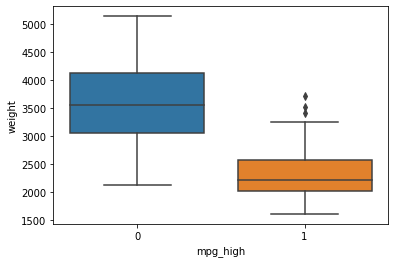

In [116]:
sb.boxplot(x='mpg_high', y='weight', data=df)

Splitting the training set:

In [117]:
x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df[['mpg_high']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (311, 7)
test size: (78, 7)


Logistic Regression:

In [118]:
log = LogisticRegression(solver='lbfgs')
log.fit(X_train, y_train.values.ravel())
log.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9067524115755627

In [119]:
 logpred = log.predict(X_test)
 print("Classification report for Logistic Regression: \n", classification_report(y_test, logpred))

Classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



Decision Tree:

In [120]:
trees = DecisionTreeClassifier()
trees.fit(X_train, y_train)
treepred = trees.predict(X_test)
print("Classification report for Decision Trees: \n", classification_report(y_test, treepred))

Classification report for Decision Trees: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.87      0.96      0.92        28

    accuracy                           0.94        78
   macro avg       0.92      0.94      0.93        78
weighted avg       0.94      0.94      0.94        78



Neural Network #1:

In [121]:
neuralscalar = preprocessing.StandardScaler().fit(X_train)
train_scale = neuralscalar.transform(X_train)
test_scale = neuralscalar.transform(X_test)

neuralLog = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,2), max_iter=500, random_state=1234)
neuralLog.fit(train_scale, y_train.values.ravel())
npred1 = neuralLog.predict(test_scale)
print("Classification report for Neural Network 1 (Logistic Regression): \n", classification_report(y_test, npred1))

Classification report for Neural Network 1 (Logistic Regression): 
               precision    recall  f1-score   support

           0       0.93      0.86      0.90        50
           1       0.78      0.89      0.83        28

    accuracy                           0.87        78
   macro avg       0.86      0.88      0.86        78
weighted avg       0.88      0.87      0.87        78



Neural Network #2:

In [122]:
neuralscalar = preprocessing.StandardScaler().fit(X_train)
train_scale = neuralscalar.transform(X_train)
test_scale = neuralscalar.transform(X_test)

neuralLog = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,6), max_iter=500, random_state=1234)
neuralLog.fit(train_scale, y_train.values.ravel())
npred2 = neuralLog.predict(test_scale)
print("Classification report for Neural Network 2 (Logistic Regression): \n", classification_report(y_test, npred2))

Classification report for Neural Network 2 (Logistic Regression): 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        50
           1       0.81      0.93      0.87        28

    accuracy                           0.90        78
   macro avg       0.88      0.90      0.89        78
weighted avg       0.90      0.90      0.90        78



Analysis: 

Between all of the algorithms, my second Neural Network Logical Regression (NNL) out performed all of the other algorithms. 

In my current run the second Neural Network had a 90% accross the board for accuracy, recall, and precision. The Decision Tree was the runner up with an accuracy and recall of 88% and a precision of 89%. This was followed by the first Neural Network with an accuracy and recall of 87% and a precision of 88%. Finally the classic Logistic Regression performed the worst with a accuracy and recall of 86% and a precision of 89%. 

I think the Neural Network Logistic Regression was able to outperform the other algorithms because Neural Networks are so much more complex than traditional machine learning practices. Because the algorithm itself is so much more complex, it is able to learn more from a small dataset (like Auto.csv). In the second iteration I think the topology of the algorithm was better suited for the dataset, resulting in better performance. Because the dataset was so small but had so much varience (shown by the large ranges and outliers in the boxplot) it was difficult for the traditional Logistic Regression and Decision Tree algorithms to perform well. 

I really preferred working with sklearn as opposed to R. R is a confusing language to use and is a little unintuative to me (which makes sense considering it initially created for statistics people). Sklearn was simple and sleek. R uses a lot more code to do the same thing sklearn accomplishes, making it a little harder to understand what is happening and how a program works. 



